In [ ]:
from google.colab import files
uploaded = files.upload()


Saving experiments.ipynb to experiments.ipynb


In [1]:
print('hey beabe')

hey beabe


In [2]:
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg
import pandas as pd

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\hetbh\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [3]:
from nltk.corpus import gutenberg

# Load the text of Shakespeare's Hamlet
data = gutenberg.raw('shakespeare-hamlet.txt')

In [4]:
with open('hamlet.txt','w')as file:
    file.write(data)

In [5]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential


In [6]:
with open('hamlet.txt','r')as file:
    text=file.read().lower()

In [7]:
text

"[the tragedie of hamlet by william shakespeare 1599]\n\n\nactus primus. scoena prima.\n\nenter barnardo and francisco two centinels.\n\n  barnardo. who's there?\n  fran. nay answer me: stand & vnfold\nyour selfe\n\n   bar. long liue the king\n\n   fran. barnardo?\n  bar. he\n\n   fran. you come most carefully vpon your houre\n\n   bar. 'tis now strook twelue, get thee to bed francisco\n\n   fran. for this releefe much thankes: 'tis bitter cold,\nand i am sicke at heart\n\n   barn. haue you had quiet guard?\n  fran. not a mouse stirring\n\n   barn. well, goodnight. if you do meet horatio and\nmarcellus, the riuals of my watch, bid them make hast.\nenter horatio and marcellus.\n\n  fran. i thinke i heare them. stand: who's there?\n  hor. friends to this ground\n\n   mar. and leige-men to the dane\n\n   fran. giue you good night\n\n   mar. o farwel honest soldier, who hath relieu'd you?\n  fra. barnardo ha's my place: giue you goodnight.\n\nexit fran.\n\n  mar. holla barnardo\n\n   bar. 

In [8]:
tokenizer=Tokenizer()

In [9]:
tokenizer.fit_on_texts([text])

In [10]:
total_words=len(tokenizer.word_index)+1

In [11]:
##create input sequences
text.split('\n')

['[the tragedie of hamlet by william shakespeare 1599]',
 '',
 '',
 'actus primus. scoena prima.',
 '',
 'enter barnardo and francisco two centinels.',
 '',
 "  barnardo. who's there?",
 '  fran. nay answer me: stand & vnfold',
 'your selfe',
 '',
 '   bar. long liue the king',
 '',
 '   fran. barnardo?',
 '  bar. he',
 '',
 '   fran. you come most carefully vpon your houre',
 '',
 "   bar. 'tis now strook twelue, get thee to bed francisco",
 '',
 "   fran. for this releefe much thankes: 'tis bitter cold,",
 'and i am sicke at heart',
 '',
 '   barn. haue you had quiet guard?',
 '  fran. not a mouse stirring',
 '',
 '   barn. well, goodnight. if you do meet horatio and',
 'marcellus, the riuals of my watch, bid them make hast.',
 'enter horatio and marcellus.',
 '',
 "  fran. i thinke i heare them. stand: who's there?",
 '  hor. friends to this ground',
 '',
 '   mar. and leige-men to the dane',
 '',
 '   fran. giue you good night',
 '',
 "   mar. o farwel honest soldier, who hath reli

In [12]:
input_sequences=[]
for line in text.split('\n'):
  token_list=tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_list)):
    n_gram_sequence=token_list[:i+1]
    input_sequences.append(n_gram_sequence)


In [13]:
input_sequences

[[1, 687],
 [1, 687, 4],
 [1, 687, 4, 45],
 [1, 687, 4, 45, 41],
 [1, 687, 4, 45, 41, 1886],
 [1, 687, 4, 45, 41, 1886, 1887],
 [1, 687, 4, 45, 41, 1886, 1887, 1888],
 [1180, 1889],
 [1180, 1889, 1890],
 [1180, 1889, 1890, 1891],
 [57, 407],
 [57, 407, 2],
 [57, 407, 2, 1181],
 [57, 407, 2, 1181, 177],
 [57, 407, 2, 1181, 177, 1892],
 [407, 1182],
 [407, 1182, 63],
 [408, 162],
 [408, 162, 377],
 [408, 162, 377, 21],
 [408, 162, 377, 21, 247],
 [408, 162, 377, 21, 247, 882],
 [18, 66],
 [451, 224],
 [451, 224, 248],
 [451, 224, 248, 1],
 [451, 224, 248, 1, 30],
 [408, 407],
 [451, 25],
 [408, 6],
 [408, 6, 43],
 [408, 6, 43, 62],
 [408, 6, 43, 62, 1893],
 [408, 6, 43, 62, 1893, 96],
 [408, 6, 43, 62, 1893, 96, 18],
 [408, 6, 43, 62, 1893, 96, 18, 566],
 [451, 71],
 [451, 71, 51],
 [451, 71, 51, 1894],
 [451, 71, 51, 1894, 567],
 [451, 71, 51, 1894, 567, 378],
 [451, 71, 51, 1894, 567, 378, 80],
 [451, 71, 51, 1894, 567, 378, 80, 3],
 [451, 71, 51, 1894, 567, 378, 80, 3, 273],
 [451, 71

In [14]:
from os.path import split
##pad_sequences
max_sequences_length=max(len(x)for x in input_sequences)

In [15]:
max_sequences_length

14

In [16]:
input_sequences=np.array(pad_sequences(input_sequences,maxlen=max_sequences_length,padding='pre'))

In [17]:
input_sequences

array([[   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       [   0,    0,    0, ...,  687,    4,   45],
       ...,
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4],
       [   0,    0,    0, ..., 1047,    4,  193]])

In [18]:
import tensorflow as tf
X,y=input_sequences[:,:-1],input_sequences[:,-1]

In [19]:
y

array([ 687,    4,   45, ..., 1047,    4,  193])

In [20]:
y=tf.keras.utils.to_categorical(y,num_classes=total_words)

In [21]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
y.shape

(25732, 4818)

In [23]:
X.shape

(25732, 13)

In [24]:
X

array([[   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       ...,
       [   0,    0,    0, ...,  687,    4,   45],
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
##training our LSTM
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
model=Sequential()
model.add(Embedding(total_words,100,input_length=max_sequences_length-1))
model.add(LSTM(150,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words,activation='softmax'))
model.build(input_shape=(None,max_sequences_length))
##compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

C:\Users\hetbh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 14, 100)             │         481,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 14, 150)             │         150,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 150)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │         100,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4818)                │         486,618 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,219,418 (4.65 MB)

 Trainable params: 1,219,418 (4.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
##train the model
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 51s 72ms/step - accuracy: 0.0317 - loss: 7.1557 - val_accuracy: 0.0336 - val_loss: 6.6808
Epoch 2/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 48s 74ms/step - accuracy: 0.0337 - loss: 6.4594 - val_accuracy: 0.0412 - val_loss: 6.7436
Epoch 3/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.0457 - loss: 6.3104 - val_accuracy: 0.0509 - val_loss: 6.7952
Epoch 4/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 80s 73ms/step - accuracy: 0.0501 - loss: 6.1929 - val_accuracy: 0.0484 - val_loss: 6.8186
Epoch 5/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 81s 71ms/step - accuracy: 0.0537 - loss: 6.0394 - val_accuracy: 0.0536 - val_loss: 6.8645
Epoch 6/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 85s 76ms/step - accuracy: 0.0606 - loss: 5.9054 - val_accuracy: 0.0604 - val_loss: 6.9168
Epoch 7/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.0724 - loss: 5.7494 - val_accuracy: 0.0639 - val_loss: 6.9493
Epoch 8/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 78s 70ms/step - accuracy: 0.0814 - loss: 5.5641 - 

In [31]:
print(history)

In [32]:
from tensorflow.keras.models import load_model
model.save('lstm_model.h5')

In [34]:
from google.colab import files
files.download('lstm_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
from tensorflow.keras.models import load_model


In [4]:
import pickle
with open('history.pkl','rb') as file:
    history=pickle.load(file)

C:\Users\hetbh\AppData\Roaming\Python\Python311\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 11 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


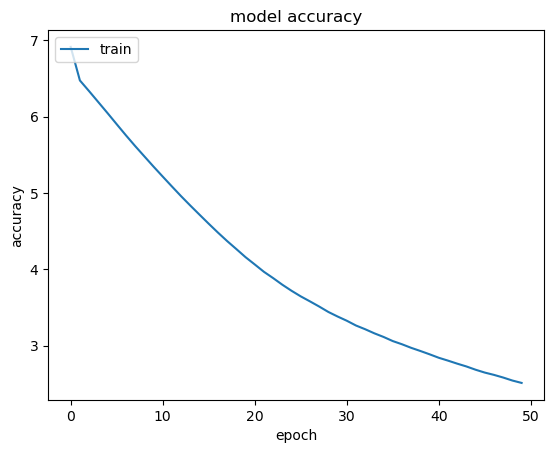

In [9]:
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

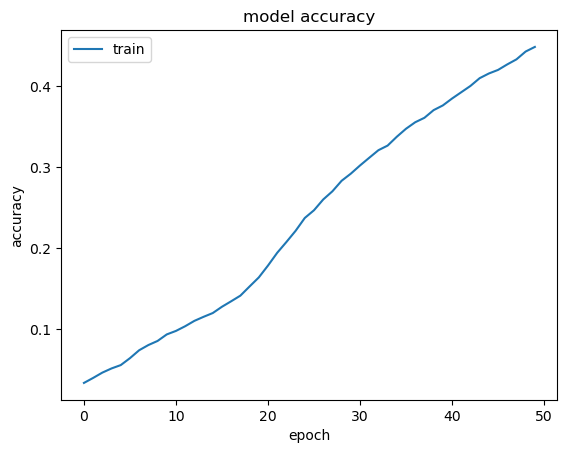

In [10]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [34]:
def predict_next_word(model,tokenizor,text,max_sequence_length):
    token_list=tokenizor.texts_to_sequences([text])[0]
    if len(token_list)>=max_sequence_length:
        token_list=token_list[-(max_sequence_length-1):]
    token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
    predicted=hamlet_model.predict(token_list)
    predicted_word_index=np.argmax(predicted,axis=1)
    for word ,index in tokenizor.word_index.items():
        if index==predicted_word_index:
            return word
    return None

In [56]:
input_text="To be or not to be"
max_sequences_length=lstm_model.input_shape[1]+1
predict_next_word(lstm_model,tokenizer,input_text,max_sequences_length)

'buried'

In [31]:
hamlet_model=load_model('hamlet_model.h5')

In [45]:
input_text="now out of"
max_sequences_length=hamlet_model.input_shape[1]+1
predict_next_word(hamlet_model,tokenizer,input_text,max_sequences_length)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


'time'